## Data Loading:

In [434]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv")

df_test = pd.read_csv("test.csv")

---

## Exploratory Data Analysis: Data description

In [435]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [436]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [437]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [438]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [439]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

---

## Data Cleaning:

In [440]:
df_train.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)
df_test.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

In [441]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [442]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

# Handling Missing Values:

In [443]:

df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

---

## Label Encoding:

In [444]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df_train['Embarked'] = label.fit_transform(df_train['Embarked'])

df_train['Sex'] = label.fit_transform(df_train['Sex'])

---

## Data imputation:

In [445]:
from sklearn.impute import SimpleImputer

df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [446]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [447]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


---

### Correlational Matrix:

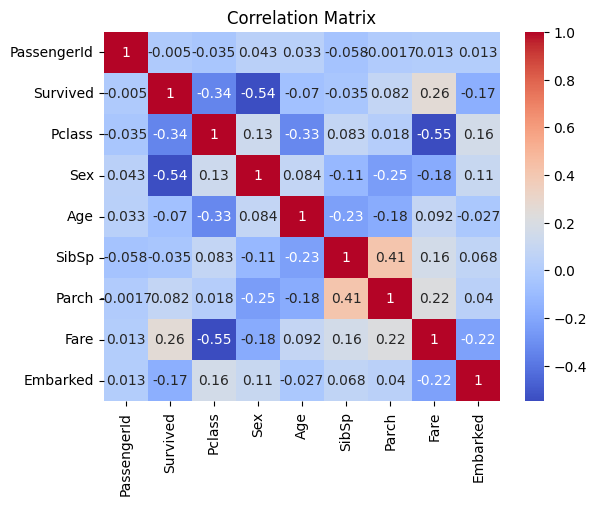

In [448]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

---

In [449]:
x = df_train.copy().drop(columns="Survived")
y = df_train['Survived']

---

## Data Scaling:

In [450]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

---

## Data Splitting:

In [451]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [452]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (623, 8)
y_train: (623,)
x_test: (268, 8)
y_test: (268,)


In [453]:
# Data Scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

---

## Model Creation, Training, Testing and Evaluation:

In [454]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score, recall_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Use the best model for prediction
y_pred = best_model.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print Metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"AUC-ROC Score: {auc_roc}")


Accuracy: 0.8171641791044776
Precision: 0.8444444444444444
Recall: 0.6846846846846847
F1 Score: 0.7562189054726368
Confusion Matrix:
[[143  14]
 [ 35  76]]
AUC-ROC Score: 0.7977563550811959
